In [96]:
# Import all libraries

import pandas as pd
import numpy as np
from math import cos, sin, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit
from numpy import arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

In [97]:
tornadoSheet = '1NB6pFdsAzoxyBXcl0BCIAfC4debi3C5wuFpD8UdFilc'
tornadoData = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{tornadoSheet}/export?format=csv")
tornadoAgg = '1obaFdrnbO8gxdTxpHPWiknYvGuRjaqWiFDTVVYSqPQg'
tornadoDataAgg = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{tornadoAgg}/export?format=csv")

In [98]:
tornadoData

,xc1950,yc1950,xc1960,yc1960,xc1970,yc1970,xc1980,yc1980,xc1990,yc1990,xc2000,yc2000,xc2010,yc2010,X data,Y data,Year
0,33.402,-91.045,31.110,-85.671,31.327,-89.290,26.237,-80.124,38.139,-97.431,37.774,-87.113,32.855,-90.406,37.761,-94.500,1950.0
1,33.178,-90.292,32.509,-92.119,35.150,-90.049,33.617,-99.218,38.248,-97.346,31.230,-84.209,46.438,-95.136,39.317,-90.618,1960.0
2,30.726,-90.512,34.257,-88.703,34.784,-91.293,40.622,-93.748,41.608,-88.204,32.756,-97.331,33.134,-88.253,38.195,-93.609,1970.0
3,35.538,-98.706,34.746,-92.288,39.768,-86.158,40.614,-79.724,40.089,-98.519,44.811,-95.545,35.223,-97.440,39.093,-90.616,1980.0
4,40.131,-95.220,35.615,-91.201,33.578,-101.855,40.926,-98.342,38.492,-87.278,33.578,-101.855,41.561,-83.424,38.956,-90.883,1990.0
5,41.123,-100.765,38.840,-97.607,40.926,-101.855,39.609,-85.446,38.666,-87.308,41.024,-100.370,43.648,-93.369,38.376,-93.270,2000.0
6,40.927,-100.372,36.261,-90.971,41.257,-98.342,45.560,-94.162,38.492,-87.278,38.483,-101.359,41.332,-87.796,39.170,-90.832,2010.0
7,45.061,-83.450,33.038,-85.034,43.545,-95.935,45.560,-94.162,38.666,-87.308,39.610,-85.447,NaN,NaN,NaN,NaN,NaN
8,44.517,-98.989,40.416,-86.872,40.869,-96.731,NaN,NaN,38.492,-87.278,44.811,-95.545,NaN,NaN,NaN,NaN,NaN
9,42.747,-98.029,45.627,-98.498,40.743,-84.584,NaN,NaN,38.666,NaN,39.685,-83.930,NaN,NaN,NaN,NaN,NaN


In [99]:
x1950 = tornadoData['xc1950']
y1950 = tornadoData['yc1950']
x1960 = tornadoData['xc1960']
y1960 = tornadoData['yc1960']
x1970 = tornadoData['xc1970']
y1970 = tornadoData['yc1970']
x1980 = tornadoData['xc1980']
y1980 = tornadoData['yc1980']
x1990 = tornadoData['xc1980']
y1990 = tornadoData['yc1990']
x2000 = tornadoData['xc1990']
y2000 = tornadoData['yc2000']
x2010 = tornadoData['xc2010']
y2010 = tornadoData['yc2010']
yAgg = tornadoData['Y data']
xAgg = tornadoData['X data']


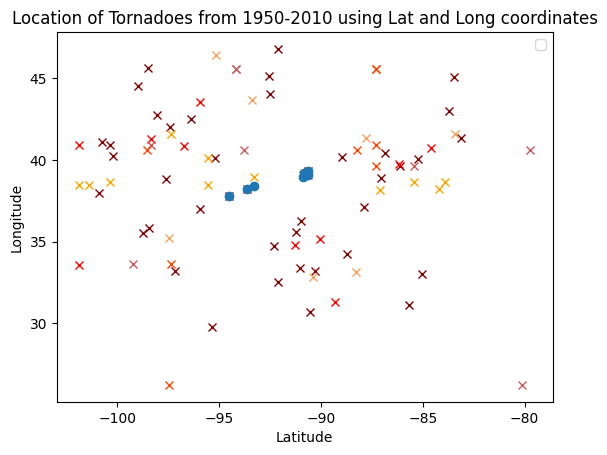

In [100]:
plt.plot(y1950, x1950, 'x', color='darkred')
plt.plot(y1960, x1960, 'x', color='maroon')
plt.plot(y1970, x1970, 'x', color='red')
plt.plot(y1980, x1980, 'x', color='indianred')
plt.plot(y1990, x1990, 'x', color='orangered')
plt.plot(y2000, x2000, 'x', color='orange')
plt.plot(y2010, x2010, 'x', color='sandybrown')
plt.plot(yAgg, xAgg, 'o')

plt.title("Location of Tornadoes from 1950-2010 using Lat and Long coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.legend()

plt.show()


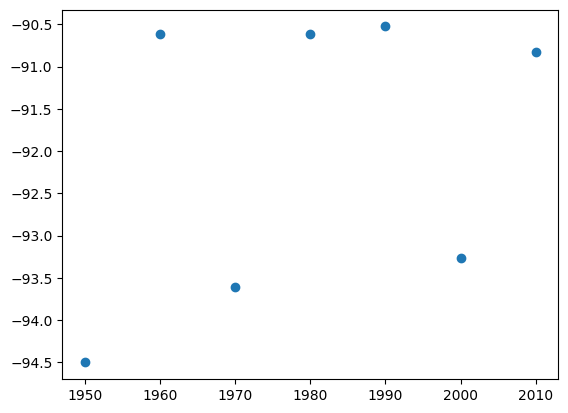

In [101]:
x = tornadoDataAgg['Year']
yAgg = tornadoDataAgg['Long']

plt.plot(x, yAgg, 'o')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, yAgg, test_size = 1, random_state = 23)

In [102]:
X_train = np.array(X_train).reshape(-1, 1)
X_train

array([[1990],
       [2000],
       [1970],
       [1960],
       [1950],
       [1980]])

In [103]:
X_test = np.array(X_test).reshape(-1, 1)
X_test

array([[2010]])

In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
c = (lr.intercept_)
c

-145.33990476190485

In [107]:
m = (lr.coef_)
m


array([0.02691143])

In [108]:
Y_pred_train = m*X_train + c
Y_pred_train

array([[-91.7861619 ],
       [-91.51704762],
       [-92.32439048],
       [-92.59350476],
       [-92.86261905],
       [-92.05527619]])

In [109]:
y_pred_train1 = lr.predict(X_train)
y_pred_train1

array([-91.7861619 , -91.51704762, -92.32439048, -92.59350476,
       -92.86261905, -92.05527619])

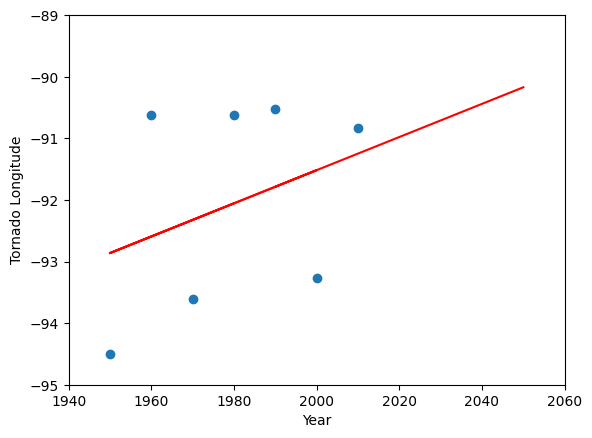

In [110]:
plt.xlim(1940, 2060)
plt.ylim(-95, -89)
plt.scatter(x, yAgg)
plt.plot(X_train, y_pred_train1, color = 'red')
plt.xlabel('Year')
plt.ylabel('Tornado Longitude')

fdot = np.linspace(1950, 2050, 200)
y = m * fdot  + c
plt.plot(fdot, y, color = 'red')

